[View in Colaboratory](https://colab.research.google.com/github/AshwiniBaipadithayaMadhusudan/MNIST-DIGIT-PREDICTION/blob/master/DigitRecognizer_visualisation.ipynb)

**MOUNTING DRIVE:**

---


Firstly, we will mount the drive so that we can access drive from colab to read and write files.


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

**INSTALLING FASTAI LIBRARY:**

---



In [0]:
!pip install fastai==0.7.0 # 0.7.0 is used to install the latest version of fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *
%matplotlib inline

**DOWNLOAD AND READ DATA:**

---
The MNIST data is downloaded from web and saved in pickle format


In [0]:
PATH="/content/drive/MNIST/" 

In [0]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [0]:
get_data(URL+FILENAME, PATH+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(PATH+FILENAME)

In [5]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [6]:
!ls {PATH}

DigitRecognizer.ipynb  mnist.pkl.gz  TESTSAFETY.csv


**PLOTTING DATA**

---



In [0]:
def show(img, title=None):                          # plot single image   
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

In [0]:
def plots(ims, figsize=(12,6), rows=2, titles=None): #plot multiple images simultaneously
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

In [9]:
x_valid.shape

(10000, 784)

In [10]:
x_imgs = np.reshape(x_valid, (-1,28,28)); x_imgs.shape

(10000, 28, 28)

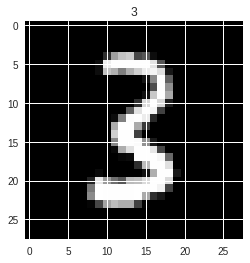

In [11]:
show(x_imgs[0], y_valid[0])

In [12]:
y_valid.shape

(10000,)

In [13]:
y_valid[0]

3

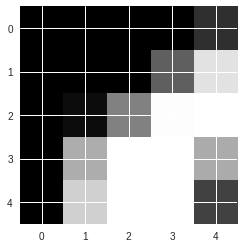

In [14]:
show(x_imgs[0,10:15,10:15])

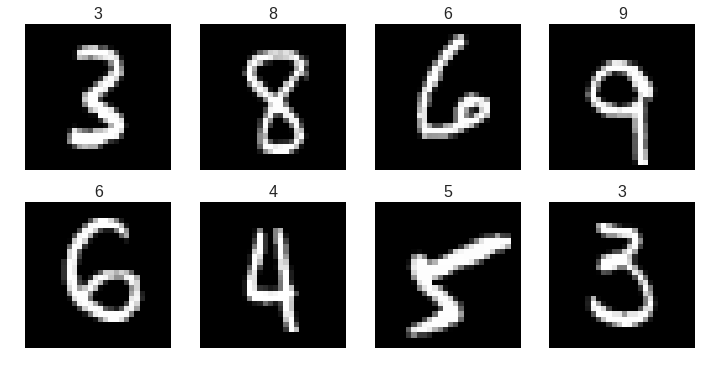

In [15]:
plots(x_imgs[:8], titles=y_valid[:8])